* My_Ordinal_Encoding
* feature_Boruta
* feature_Wrapper_RFE
* make_mi_scores_Regression plot_mi_scores
* feature_RidgeRegression
* Feature_Selector = BorutaShap(importance_measure='shap',classification=False) **Very expensive 4hrs +**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train (1).csv')
print(train.shape)
#train.head().T

test = pd.read_csv('test (1).csv')
print(test.shape)
#test.head().T

cats_train = train.select_dtypes(include='object').columns
cats_test = test.select_dtypes(include='object').columns
print('No of train cat_cols : ',len(cats_train))
print('No of test cat_cols : ',len(cats_test))

(1460, 81)
(1459, 80)
No of train cat_cols :  43
No of test cat_cols :  43


In [3]:
def check_subset(train,test,column_list):
    false_list=[]
    for col in column_list:
        boolean = set(test[col].unique()).issubset(set(train[col].unique()))
        if boolean== False:
            #print("column : ",col)
            #print("test is a subset: ",boolean)
            #print("====================")
            false_list.append(col)
    return false_list
false_subset = check_subset(train,test,cats_train)
false_subset

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [4]:
nums_train = train.select_dtypes(exclude='object').columns
nums_test = test.select_dtypes(exclude='object').columns
print('No of train nums_cols : ',len(nums_train))
print('No of test nums_cols : ',len(nums_test))

No of train nums_cols :  38
No of test nums_cols :  37


In [5]:
target = 'Response'

In [6]:
test.loc[:,target] = 'test_col'

In [7]:
merged = pd.concat([train,test],axis=0)

### shape
(1460, 81)
(1459, 80)

In [8]:
type(m_cat_perc)

NameError: name 'm_cat_perc' is not defined

In [32]:
def missing_values(train,test,merged,column_list):
    row_train = train.shape[0]; row_test = test.shape[0] ; row_merged = merged.shape[0]
    train_null = train[column_list].isna().sum() 
    test_null = test[column_list].isna().sum()
    merged_null = merged[column_list].isna().sum() ; merged_null = merged_null.sort_values(ascending=False)
    train_perc = train_null / row_train ; test_perc = test_null / row_test
    merge_perc = merged_null/ row_merged
    idx = merged_null.index.to_list()
    null_df = pd.concat([merged_null,train_null,test_null,merge_perc,train_perc,test_perc],axis=1,keys=idx)
    null_df.columns= ['merged_null','train_null','test_null','merge_perc','train_perc','test_perc']
    null_df_out = null_df.query(' merged_null > 0 and train_null > 0 and test_null> 0 and merge_perc> 0 and train_perc> 0 and test_perc > 0' )
    return null_df_out
    
    
missing_values(train,test,merged,cats_test)    

,merged_null,train_null,test_null,merge_perc,train_perc,test_perc
PoolQC,2909,1453,1456,0.996574,0.995205,0.997944
MiscFeature,2814,1406,1408,0.964029,0.963014,0.965045
Alley,2721,1369,1352,0.932169,0.937671,0.926662
Fence,2348,1179,1169,0.804385,0.807534,0.801234
FireplaceQu,1420,690,730,0.486468,0.472603,0.500343
GarageCond,159,81,78,0.054471,0.055479,0.053461
GarageQual,159,81,78,0.054471,0.055479,0.053461
GarageFinish,159,81,78,0.054471,0.055479,0.053461
GarageType,157,81,76,0.053786,0.055479,0.052090
BsmtCond,82,37,45,0.028092,0.025342,0.030843


In [71]:
miss_cats=missing_values(train,test,merged,cats_test)

In [72]:
miss_cats.index.to_list()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType2',
 'BsmtFinType1',
 'MasVnrType']

In [33]:
missing_values(train,test,merged,nums_test)

,merged_null,train_null,test_null,merge_perc,train_perc,test_perc
LotFrontage,486,259,227,0.166495,0.177397,0.155586
GarageYrBlt,159,81,78,0.054471,0.055479,0.053461
MasVnrArea,23,8,15,0.007879,0.005479,0.010281


Create the following features:

- `LivLotRatio`: the ratio of `GrLivArea` to `LotArea`
- `Spaciousness`: the sum of `FirstFlrSF` and `SecondFlrSF` divided by `TotRmsAbvGrd`
- `TotalOutsideSF`: the sum of `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `Threeseasonporch`, and `ScreenPorch`

Let's try creating a feature that describes how many kinds of outdoor areas a dwelling has. Create a feature `PorchTypes` that counts how many of the following are greater than 0.0:

```
WoodDeckSF
OpenPorchSF
EnclosedPorch
Threeseasonporch
ScreenPorch
```

In [ ]:
X_1["LivLotRatio"] = X.GrLivArea  /X.LotArea
X_1["Spaciousness"] = (X.FirstFlrSF + X.SecondFlrSF) / X.TotRmsAbvGrd
X_1["TotalOutsideSF"] =  X.WoodDeckSF + X.OpenPorchSF + X.EnclosedPorch + X.Threeseasonporch + X.ScreenPorch

X_3["PorchTypes"] = X[['WoodDeckSF','OpenPorchSF','EnclosedPorch','Threeseasonporch','ScreenPorch']].gt(0).sum(axis=1)


In [9]:
m_cat_null =merged[cats_test].isna().sum()

In [1]:
drop1 = ['PoolQC','MiscFeature','Alley','Fence']

In [40]:
m1 = merged.drop(drop1,axis=1)

In [55]:
def new_features1(train):
    X= train.copy()
    X["LivLotRatio"] = X.GrLivArea  /X.LotArea
    X["Spaciousness"] = X['1stFlrSF'] + X['2ndFlrSF'] / X.TotRmsAbvGrd
                         
    X["TotalOutsideSF"] =  X.WoodDeckSF + X.OpenPorchSF + X.EnclosedPorch + X['3SsnPorch'] + X.ScreenPorch
    X["PorchTypes"] = X[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].gt(0).sum(axis=1)
    return X
    

In [56]:
m2 = new_features1(m1)

In [62]:
def merge_split_train_test(merge_df,test_idx):
    test_ = merge_df.iloc[test_idx:,:]
    train_ = merge_df.iloc[:test_idx,:]
    return train_ ,test_
    

In [63]:
test_idx = train.shape[0]
tr2 ,te2 = merge_split_train_test(m2,test_idx)

In [64]:
tr2.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LivLotRatio,Spaciousness,TotalOutsideSF,PorchTypes
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,8,2007,WD,Normal,175000.0,0.208033,1052.142857,40,1
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2010,WD,Normal,210000.0,0.157343,2073.000000,349,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,2500,5,2010,WD,Normal,266500.0,0.258792,1316.000000,60,1
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,Normal,142125.0,0.110940,1078.000000,478,2
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,6,2008,WD,Normal,147500.0,0.126396,1256.000000,804,2


In [65]:
te2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LivLotRatio,Spaciousness,TotalOutsideSF,PorchTypes
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,6,2010,WD,Normal,NaN,0.077095,896.000000,260,2
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,12500,6,2010,WD,Normal,NaN,0.093152,1329.000000,429,2
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,3,2010,WD,Normal,NaN,0.117787,1044.833333,246,2
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,6,2010,WD,Normal,NaN,0.160754,1022.857143,396,2
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,1,2010,WD,Normal,NaN,0.255744,1280.000000,226,2


In [69]:
missing_values(train=tr2,test=te2,merged=m2,column_list=m2.columns)

,merged_null,train_null,test_null,merge_perc,train_perc,test_perc
FireplaceQu,1420,690,730,0.486468,0.472603,0.500343
LotFrontage,486,259,227,0.166495,0.177397,0.155586
GarageCond,159,81,78,0.054471,0.055479,0.053461
GarageFinish,159,81,78,0.054471,0.055479,0.053461
GarageYrBlt,159,81,78,0.054471,0.055479,0.053461
GarageQual,159,81,78,0.054471,0.055479,0.053461
GarageType,157,81,76,0.053786,0.055479,0.052090
BsmtCond,82,37,45,0.028092,0.025342,0.030843
BsmtExposure,82,38,44,0.028092,0.026027,0.030158
BsmtQual,81,37,44,0.027749,0.025342,0.030158


In [ ]:
def get_cat_num_columns(train,test):    
    cats_train = train.select_dtypes(include='object').columns
    # automatically drop the target column
    nums_test = test.select_dtypes(exclude='object').columns
    print('No of train cat_cols : ',len(cats_train))
    print('No of test cat_cols : ',len(nums_test))
    return cats_train , nums_test

In [70]:
# tryna fill the cats with unknown
def find_and_replace_Nan(train,column_list):
    for column in column_list:
        null_idx = train[train[column].isnull()].index.to_list()
        train.loc[null_idx,column]='empty'
    return train
    

In [74]:
cat_nan= ['FireplaceQu','GarageCond','GarageQual','GarageFinish', 'GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']

In [79]:
num_nan = ['LotFrontage','GarageYrBlt','MasVnrArea']

In [78]:
def find_and_replace_Nan_num(train,column_list):
    for column in column_list:
        null_idx = train[train[column].isnull()].index.to_list()
        train.loc[null_idx,column]= np.mean(train[column])
    return train

### nan = empty

In [75]:
m3 = find_and_replace_Nan(m2,cat_nan)

### nan = mean

In [80]:
tr3 ,te3 = merge_split_train_test(m3,test_idx)
m4 = find_and_replace_Nan_num(tr3,num_nan)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
def cross_val_class(X_train,y_train,classifier_list,classifier_name,scoring):
    """
    run quick cross validation
    params :
            :- classifier_list = array of models 
                    e.g >>> model = [AdaBoostClassifier(),RandomForestClassifier(n_estimators=50,max_leaf_nodes=25)]
            
            :- classifier_name = array (description of the model)
                    e.g >>> model_name= ['AdaBoostClassifier()','RandomForestClassifier','xg','et','lr','nb_m','dr']
                    
            Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

    """
    from sklearn.model_selection import cross_val_score,StratifiedShuffleSplit
    #kf=StratifiedShuffleSplit()
    mod=[]
    cv_score=[]
    for m in classifier_list:
        cv_score.append(cross_val_score(m,X_train,y_train,scoring=scoring,cv=5))
        #score = np.sqrt(score)
    cross_val = pd.DataFrame(cv_score,index=classifier_name)
    return cross_val

In [99]:
def My_Ordinal_Encoding(train):
    """
        return dataframe with Ordinal encoded categorical columns
            params :
                            train = Pandas dataframe of Train
    """
    mx_LE = train.copy()
    for colname in mx_LE.select_dtypes(["category", "object"]):
        mx_LE[colname], _ = mx_LE[colname].factorize()
    return mx_LE

In [102]:
def feature_Boruta(X_train_df,X_train_values, y_train_values,classifier):
    from boruta import BorutaPy
    #sampling in proportion to y labels    
#define Boruta feature selection method
    feat_selector = BorutaPy(classifier, n_estimators='auto', verbose=2, random_state=1)
#find all relevant features - 5 features should be selected
    feat_selector.fit(X_train_values, y_train_values)
#check selected features - first 5 features are selected
    feat_selector.support_
#check ranking of features
    feat_selector.ranking_
#call transform() on X to filter it down to selected features
    X_filtered = feat_selector.transform(X_train_values)
#To get the new X_train now with selected features
    return X_train_df.columns[feat_selector.support_]

In [103]:
def feature_Wrapper_RFE(X_train,y_train,model,n_features):
    #Import your necessary dependencies
    from sklearn.feature_selection import RFE
    #You will use RFE with the  classifier/regressor to select the top n_features.
#Feature extraction
    rfe = RFE(model, n_features)
    fit = rfe.fit(X_train, y_train)
    print("Num Features: %s" % (fit.n_features_))
    print("Selected Features: %s" % (fit.support_))
    print("Feature Ranking: %s" % (fit.ranking_))
    return X_train.columns[fit.support_]


In [108]:
def make_mi_scores_Regression(X_train, y_train):
    # All discrete features should now have integer dtypes (double-check this before using MI!)
    discrete_features = X_train.dtypes == int
    mi_scores = mutual_info_regression(X_train, y_train, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [109]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [120]:
def feature_RidgeRegression(X_train,y_train):
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train,y_train)

    Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)
    
    #A helper method for pretty-printing the coefficients
    def pretty_print_coefs(coefs, names = None, sort = False):
        if names == None:
            names = ["X%s" % x for x in range(len(coefs))]
        lst = zip(coefs, names)
        if sort:
            lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
        return " + ".join("%s * %s" % (round(coef, 3), name)
                                       for coef, name in lst)
    columns = X_train.columns
    print ("Ridge model:", pretty_print_coefs(ridge.coef_))
    df =pd.Series(data=ridge.coef_,index=columns,name= 'Ridge_Coef')
    return df
    

In [ ]:
mi_scores=make_mi_scores_Regression(X_train, y_train)

In [83]:
from sklearn.model_selection import KFold,StratifiedKFold, train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor   
#from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import  mean_absolute_error,r2_score,mean_squared_error    #confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline

In [111]:
from sklearn.feature_selection import mutual_info_regression

In [85]:
## base models

In [84]:
#
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import  mean_absolute_error,r2_score,mean_squared_error
las_R = Lasso()
L_R = LinearRegression()
rf = RandomForestRegressor(n_estimators=200)
et= ExtraTreesRegressor(n_estimators=200)
from sklearn.tree import DecisionTreeRegressor
D_R = DecisionTreeRegressor()
# 
#from sklearn.metrics import SCORERS
#SCORERS.keys()

classifier_list= [rf,et,L_R,las_R,D_R]
classifier_name =['rf','et','L_R','las_R','D_R']
scoring ='neg_root_mean_squared_error'

In [97]:
classifier_list= [rf,et,L_R,las_R,D_R]
classifier_name =['rf','et','L_R','las_R','D_R']
scoring ='neg_root_mean_squared_error'

In [95]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [100]:
X_train= m4.drop("SalePrice",axis=1)
X_train = My_Ordinal_Encoding(X_train)
y_train= m4.SalePrice
cross_val_class(X_train,y_train,classifier_list,classifier_name,scoring)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608769420261.2249, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526648361096.3328, tolerance: 728773513.025937
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550738486440.9121, tolerance: 699031751.5199751
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

,0,1,2,3,4
rf,-27651.440058,-32793.208504,-30883.620784,-25560.666653,-35545.049572
et,-22782.850364,-35468.411842,-31279.321971,-22956.753625,-34205.848235
L_R,-27335.833268,-37992.617429,-34749.489946,-28992.967283,-48417.498019
las_R,-27374.243400,-37811.882730,-34797.269276,-28885.055367,-48455.756312
D_R,-40784.714985,-36433.749764,-41231.545077,-34638.975557,-52170.538892


In [104]:
borr_rf = feature_Boruta(X_train,X_train.values, y_train.values,classifier=rf)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	80
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	80
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	80
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	80
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	80
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	80
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	80
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	17
Rejected: 	51
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	17
Rejected: 	51
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	17
Rejected: 	51
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	17
Rejected: 	51
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	17
Rejected: 	51
Iteration: 	13 / 100
Confirmed: 	12
Tentative: 	16
Rejected: 	52
Iteration: 	14 / 100
Confirmed: 	12
Tentative: 	16
Rejected: 	52
Iteration: 	15 / 100
Confirmed: 	12
Tentative: 	16
Rejected: 	52
Iteration: 	16 / 100
Confirmed: 	12
Tentative: 	

In [106]:
RFE_rf = feature_Wrapper_RFE(X_train,y_train,model=rf,n_features=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 10
Selected Features: [False False False False  True False False False False False False False
 False False False False  True False  True False False False False False
 False False False False False False False False False  True False False
 False  True False False False False False  True False  True False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False  True False False]
Feature Ranking: [11 22 30  3  1 70 29 50 71 54 52 13 48 68 57 35  1 12  1  2 42 64 19 28
 36  5 25 55 51 20 59 27 26  1 61 49  9  1 66 47 18 63  7  1 67  1 43 62
  8 37 31 40 23  6 45 16 34 24 14 38  1  1 53 60 58 21 15 41 56 44 69 65
 17 33 39 32 10  1  4 46]


In [112]:
mi_scores=make_mi_scores_Regression(X_train, y_train)

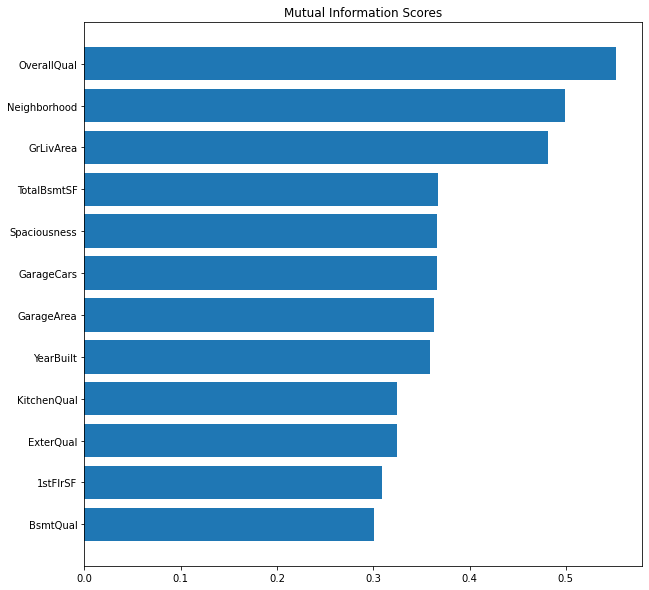

In [117]:
plt.figure(figsize=(10,10))
plot_mi_scores(mi_scores.head(12))

In [122]:
feat_ridge=feature_RidgeRegression(X_train,y_train)

Ridge model: -1.235 * X0 + -92.199 * X1 + 531.44 * X2 + -138.234 * X3 + 0.29 * X4 + -28653.736 * X5 + 429.803 * X6 + 2454.777 * X7 + -26278.796 * X8 + 1338.452 * X9 + 7073.55 * X10 + -139.592 * X11 + -2449.209 * X12 + -9932.077 * X13 + -951.655 * X14 + -495.849 * X15 + 14988.081 * X16 + 5496.719 * X17 + 388.201 * X18 + 150.327 * X19 + 6828.937 * X20 + -12743.66 * X21 + -1030.115 * X22 + 1104.424 * X23 + 2014.537 * X24 + 26.198 * X25 + 1940.67 * X26 + 925.705 * X27 + -2195.337 * X28 + 5789.943 * X29 + -3239.179 * X30 + 1592.132 * X31 + -2031.777 * X32 + 2.684 * X33 + -1398.897 * X34 + 12.442 * X35 + -4.008 * X36 + 11.118 * X37 + 1032.129 * X38 + -2341.129 * X39 + 4783.089 * X40 + 1150.18 * X41 + 141.731 * X42 + -6.42 * X43 + -51.556 * X44 + 83.755 * X45 + 7428.616 * X46 + 1206.093 * X47 + 6841.941 * X48 + 385.058 * X49 + -7148.408 * X50 + -18344.378 * X51 + 8485.275 * X52 + 1690.681 * X53 + -4089.612 * X54 + 2835.628 * X55 + 1886.228 * X56 + 1.671 * X57 + 21.481 * X58 + 1194.946 * X59 +

In [105]:
borr_rf

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Spaciousness',
       'TotalOutsideSF'],
      dtype='object')

In [107]:
RFE_rf

Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'Spaciousness'],
      dtype='object')

In [132]:
RFE_rf_col = RFE_rf.to_list()

In [114]:
mi_scores.head(10)

OverallQual     0.551995
Neighborhood    0.499592
GrLivArea       0.481944
TotalBsmtSF     0.367247
Spaciousness    0.366144
GarageCars      0.365902
GarageArea      0.363585
YearBuilt       0.358849
KitchenQual     0.324513
ExterQual       0.324295
Name: MI Scores, dtype: float64

In [125]:
feat_ridge.head(12).sort_values(ascending=False)

LandSlope        7073.549861
LandContour      2454.776705
LotConfig        1338.452188
MSZoning          531.439573
LotShape          429.803161
LotArea             0.289799
Id                 -1.235220
MSSubClass        -92.199217
LotFrontage      -138.234304
Neighborhood     -139.591562
Utilities      -26278.795899
Street         -28653.736219
Name: Ridge_Coef, dtype: float64

In [126]:
from BorutaShap import BorutaShap
# no model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, random_state=0)


31 attributes confirmed important: ['YearBuilt', 'OverallCond', 'GarageCars', 'BsmtFinSF1', 'MSSubClass', 'YearRemodAdd', 'GrLivArea', '2ndFlrSF', 'TotalOutsideSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'OverallQual', 'FullBath', 'WoodDeckSF', 'BsmtFinType1', 'LotShape', 'GarageYrBlt', 'KitchenQual', 'TotalBsmtSF', 'GarageArea', 'Neighborhood', 'BsmtQual', 'Fireplaces', 'OpenPorchSF', 'Spaciousness', 'GarageType', '1stFlrSF', 'MSZoning', 'LotArea', 'CentralAir']
47 attributes confirmed unimportant: ['Exterior1st', 'BsmtHalfBath', 'BsmtFinSF2', 'Street', '3SsnPorch', 'SaleType', 'SaleCondition', 'Exterior2nd', 'Electrical', 'Utilities', 'BldgType', 'Id', 'BsmtExposure', 'BsmtFinType2', 'FireplaceQu', 'Condition2', 'MiscVal', 'MoSold', 'RoofMatl', 'GarageCond', 'LivLotRatio', 'LotConfig', 'MasVnrType', 'LandContour', 'Condition1', 'ScreenPorch', 'GarageFinish', 'BsmtFullBath', 'Functional', 'RoofStyle', 'HalfBath', 'LowQualFinSF', 'KitchenAbvGr', 'HeatingQC', 'PoolArea', 'PavedDrive

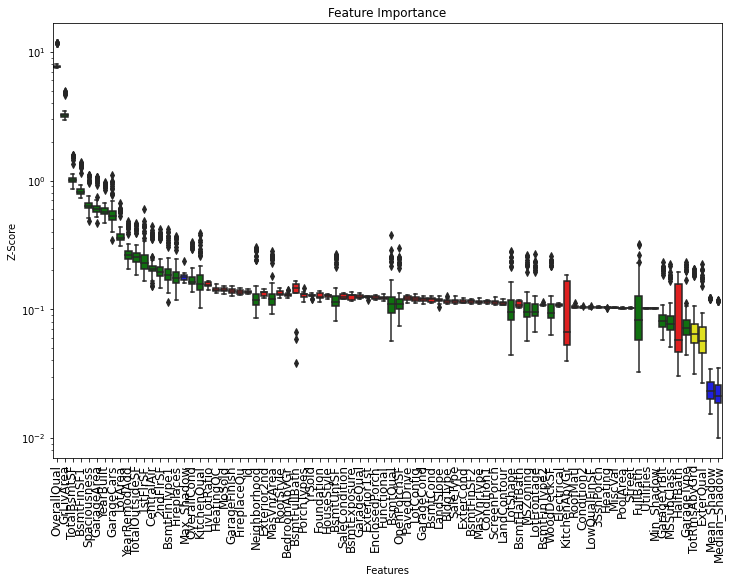

In [127]:
# Returns Boxplot of features
# I would recommend plotting Y axis on the Log Scale
Feature_Selector.plot(X_size=12, figsize=(12,8),
            y_scale='log', which_features='all')

In [129]:
subset_Buroto1 = Feature_Selector.Subset()
subset_Buroto1.head()

,YearBuilt,OverallCond,GarageCars,BsmtFinSF1,MSSubClass,YearRemodAdd,GrLivArea,2ndFlrSF,TotalOutsideSF,BsmtUnfSF,...,Neighborhood,BsmtQual,Fireplaces,OpenPorchSF,Spaciousness,GarageType,1stFlrSF,MSZoning,LotArea,CentralAir
0,2003,5,2.0,706.0,60,2003,1710,854,61,150.0,...,0,0,0,61,962.750000,0,856,0,8450,0
1,1976,8,2.0,978.0,20,1976,1262,0,298,284.0,...,1,0,1,0,1262.000000,0,1262,0,9600,0
2,2001,5,2.0,486.0,60,2002,1786,866,42,434.0,...,0,0,1,42,1064.333333,0,920,0,11250,0
3,1915,5,3.0,216.0,70,1970,1717,756,307,540.0,...,2,1,1,35,1069.000000,1,961,0,9550,0
4,2000,5,3.0,655.0,60,2000,2198,1053,276,490.0,...,3,0,1,84,1262.000000,0,1145,0,14260,0


In [130]:
X_train1= subset_Buroto1
#X_train = My_Ordinal_Encoding(X_train)
y_train1= y_train
cross_val_class(X_train1,y_train1,classifier_list,classifier_name,scoring)

,0,1,2,3,4
rf,-27623.649733,-34118.788590,-31005.126751,-24453.750332,-32710.603228
et,-23914.476274,-35618.683537,-29186.791508,-22001.365573,-28623.730433
L_R,-28137.486892,-35563.687855,-35647.505932,-29003.441848,-47862.097837
las_R,-28161.987461,-35441.780021,-35789.289555,-28872.734649,-47964.950560
D_R,-44156.839622,-39547.099805,-40285.605265,-42621.468176,-50355.643746


In [135]:
boruta_trim = ['YearBuilt', 'OverallCond', 'GarageCars', 'BsmtFinSF1', 'MSSubClass', 'YearRemodAdd', 'GrLivArea', '2ndFlrSF', 'TotalOutsideSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'OverallQual', 'FullBath', 'WoodDeckSF', 'BsmtFinType1', 'LotShape', 'GarageYrBlt', 'KitchenQual', 'TotalBsmtSF', 'GarageArea']

In [133]:
X_train2= X_train[RFE_rf_col]
#X_train = My_Ordinal_Encoding(X_train)
y_train2= y_train
cross_val_class(X_train2,y_train2,classifier_list,classifier_name,scoring)

,0,1,2,3,4
rf,-28820.488497,-34715.739631,-31454.211022,-26400.007692,-32911.627268
et,-27199.817712,-37638.677414,-29821.442609,-24737.178185,-28067.238590
L_R,-30894.049598,-35889.258758,-39852.765848,-32478.517219,-50081.294437
las_R,-30893.799988,-35889.016268,-39852.346464,-32477.911807,-50082.754990
D_R,-47937.359986,-44024.962925,-36687.779082,-33973.370814,-47587.708179


In [134]:
borr_rf_col = borr_rf.to_list()
X_train3= X_train[borr_rf_col]
#X_train = My_Ordinal_Encoding(X_train)
y_train3= y_train
cross_val_class(X_train3,y_train3,classifier_list,classifier_name,scoring)

,0,1,2,3,4
rf,-28399.591833,-33938.237559,-30699.133237,-26631.079820,-32981.383918
et,-26401.163269,-35465.460647,-28963.839881,-23583.679664,-28142.486504
L_R,-29853.217983,-36293.466964,-37737.684032,-32602.996030,-49804.983467
las_R,-30053.458360,-35673.708327,-38062.589360,-32371.073098,-50006.078280
D_R,-39621.364233,-37821.673596,-37181.307303,-35852.208325,-47622.754997


In [136]:
#borr_rf_col = borr_rf.to_list()
X_train4= X_train[boruta_trim]
#X_train = My_Ordinal_Encoding(X_train)
y_train4= y_train
cross_val_class(X_train4,y_train4,classifier_list,classifier_name,scoring)

,0,1,2,3,4
rf,-27987.433783,-34277.881392,-30682.350084,-24253.487175,-32329.878297
et,-25202.997821,-35054.391703,-30081.182586,-23711.631314,-32095.119002
L_R,-29014.772039,-36833.222038,-36699.433446,-30041.935135,-48198.332898
las_R,-29014.017169,-36832.880915,-36699.165432,-30041.715926,-48200.159739
D_R,-40594.741614,-39062.992200,-37978.700242,-44722.666581,-40460.082559


In [138]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   int64  
 3   LotFrontage     1460 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   int64  
 6   LotShape        1460 non-null   int64  
 7   LandContour     1460 non-null   int64  
 8   Utilities       1460 non-null   int64  
 9   LotConfig       1460 non-null   int64  
 10  LandSlope       1460 non-null   int64  
 11  Neighborhood    1460 non-null   int64  
 12  Condition1      1460 non-null   int64  
 13  Condition2      1460 non-null   int64  
 14  BldgType        1460 non-null   int64  
 15  HouseStyle      1460 non-null   int64  
 16  OverallQual     1460 non-null   int64  
 17  OverallCond     1460 non-null   i

In [139]:
MVA_col=['MasVnrArea', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea',
       'GarageCars', 'TotalBsmtSF']

In [140]:
LFt_col =['LotFrontage', '1stFlrSF', 'LotArea', 'GrLivArea', 'TotalBsmtSF',
       'TotRmsAbvGrd', 'GarageArea', 'GarageCars']

In [142]:
GvB_col=['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea',
       'OverallQual', 'SalePrice', 'FullBath', 'TotalBsmtSF']

In [145]:
m3 = find_and_replace_Nan(m2,cat_nan)
#m5 = find_and_replace_Nan_num(tr5,num_nan)
m5 = My_Ordinal_Encoding(m3)
tr5 ,te5 = merge_split_train_test(m5,test_idx)

In [168]:
def find_and_replace_Nan_with_Et(merged_df,test_idx,column,column_list):
        train_ = merged_df.iloc[:test_idx,:]
        total_idx = train.index.to_list()
        null_idx = train[train[column].isnull()].index.to_list()
        #train.loc[null_idx,column]= np.mean(train[column])
        train_idx =  np.delete(total_idx,null_idx)       
        X_train = train[column_list]
        X_train1= X_train.iloc[train_idx,:] ; X_train1 = X_train1.drop(column,axis=1) ; y_train1 = X_train1[column]
        X_preds= X_train.iloc[null_idx,:] ; X_preds1 = X_preds.drop(column,axis=1) 
        
        from sklearn.ensemble import VotingRegressor
        lr=LinearRegression(); et =ExtraTreesRegressor(n_estimators=200);dt= DecisionTreeRegressor()
        voting_clf = VotingRegressor( estimators=[('lr', lr), ('et', et), ('decision', dt)], voting='hard')
        voting_clf.fit(X_train1, y_train1)
        preds = voting_clf.predict(X_preds1)
        train.loc[null_idx,column] = preds 
        return train

In [152]:
a=[1,23,3,4,5,6,6,7,8,9,10]
b=[1,4,5]
np.delete(a,b)

array([ 1,  3,  4,  6,  7,  8,  9, 10])

In [157]:
tr5.MasVnrArea.isna().sum()

0

In [163]:
missing_values(m5,m5,m5,column_list=m3.columns.to_list())

,merged_null,train_null,test_null,merge_perc,train_perc,test_perc
SalePrice,1459,1459,1459,0.499829,0.499829,0.499829
LotFrontage,227,227,227,0.077766,0.077766,0.077766
GarageYrBlt,78,78,78,0.026721,0.026721,0.026721
MasVnrArea,15,15,15,0.005139,0.005139,0.005139
BsmtFullBath,2,2,2,0.000685,0.000685,0.000685
BsmtHalfBath,2,2,2,0.000685,0.000685,0.000685
GarageArea,1,1,1,0.000343,0.000343,0.000343
BsmtFinSF2,1,1,1,0.000343,0.000343,0.000343
BsmtFinSF1,1,1,1,0.000343,0.000343,0.000343
BsmtUnfSF,1,1,1,0.000343,0.000343,0.000343


In [169]:
train_tree_filled = find_and_replace_Nan_with_Et(merged,test_idx,column='MasVnrArea',column_list=MVA_col)

KeyError: 'MasVnrArea'